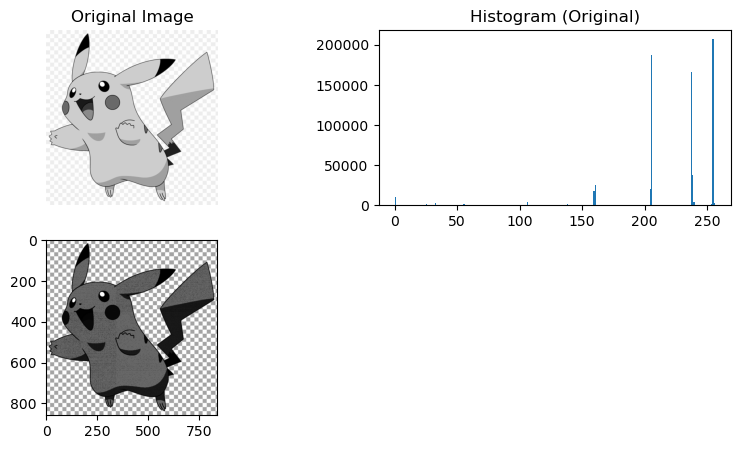

In [4]:
import cv2
import matplotlib.pyplot as plt
# Read a grayscale image
image = cv2.imread('/Users/230696/Downloads/cartoon-11551057788bw864qbup7.png', cv2.IMREAD_GRAYSCALE)
# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)
# Display the original and equalized images
plt.figure(figsize=(10,5))
# Original image and its histogram
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.hist(image.ravel(), 256, [0,256])
plt.title('Histogram (Original)')
# Equalized image and its histogram
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')

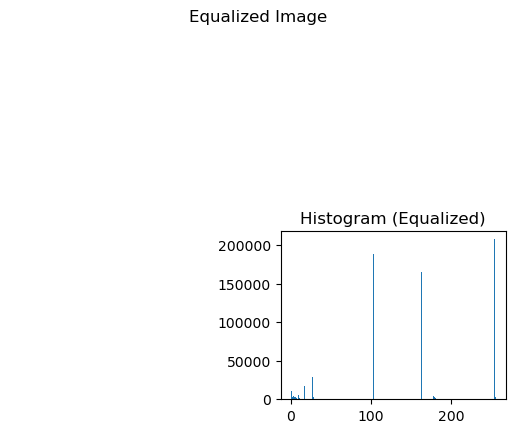

In [5]:
plt.title('Equalized Image')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.hist(equalized_image.ravel(), 256, [0,256])
plt.title('Histogram (Equalized)')
plt.show()

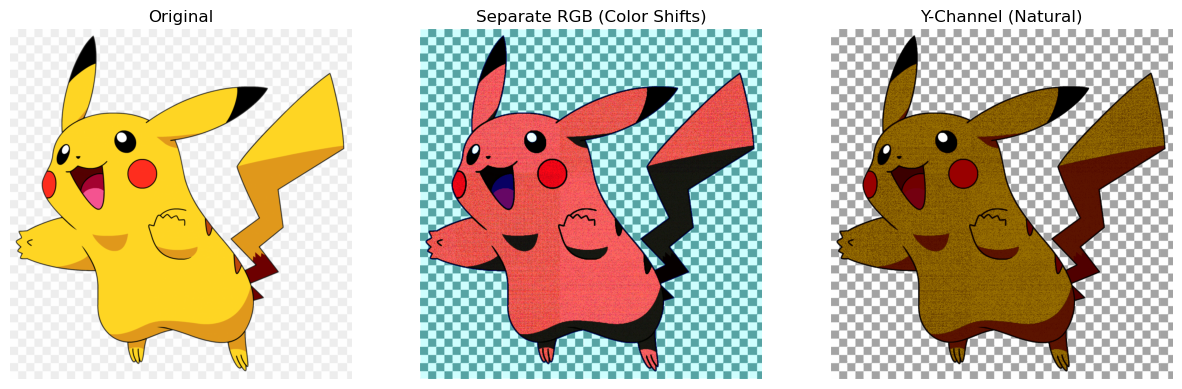

In [10]:
import cv2
import matplotlib.pyplot as plt

# Read the image
path = '/Users/230696/Downloads/cartoon-11551057788bw864qbup7.png'
color_image = cv2.imread(path)

if color_image is None:
    print("Error: Image not found. Check the file path.")
else:
    # --- METHOD 1: Equalizing RGB Channels Separately (Your original approach) ---
    b, g, r = cv2.split(color_image)
    eq_b = cv2.equalizeHist(b)
    eq_g = cv2.equalizeHist(g)
    eq_r = cv2.equalizeHist(r)
    equalized_rgb_sep = cv2.merge([eq_b, eq_g, eq_r])

    # --- METHOD 2: Equalizing Y channel (Better for color preservation) ---
    img_yuv = cv2.cvtColor(color_image, cv2.COLOR_BGR2YUV)
    # Equalize the Y (luminance) channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    # Convert back to BGR
    equalized_yuv = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

    # --- Display Results ---
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(equalized_rgb_sep, cv2.COLOR_BGR2RGB))
    plt.title('Separate RGB (Color Shifts)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(equalized_yuv, cv2.COLOR_BGR2RGB))
    plt.title('Y-Channel (Natural)')
    plt.axis('off')


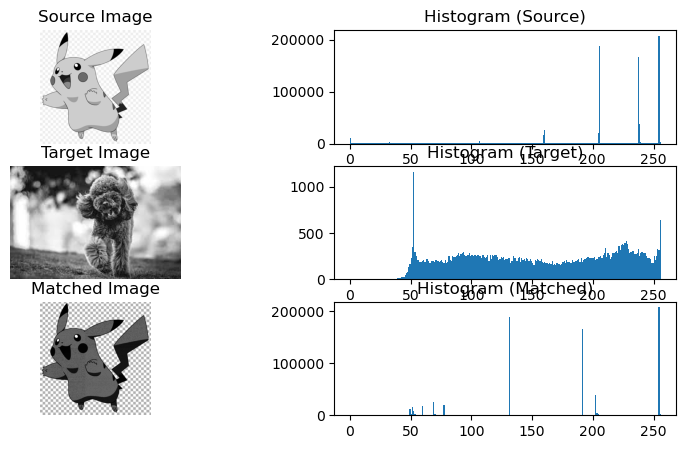

In [25]:
import cv2
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt
# Read two grayscale images
image_source = cv2.imread('/Users/230696/Downloads/cartoon-11551057788bw864qbup7.png',cv2.IMREAD_GRAYSCALE)
image_target = cv2.imread('/Users/230696/Downloads/images.jpeg',cv2.IMREAD_GRAYSCALE)
matched_image = exposure.match_histograms(image_source,image_target)
plt.figure(figsize=(15,5))
plt.subplot(3, 3, 1)
plt.imshow(image_source, cmap='gray')
plt.title('Source Image')
plt.axis('off')
plt.subplot(3, 3, 2)
plt.hist(image_source.ravel(), 256, [0,256])
plt.title('Histogram (Source)')
# Target image and its histogram
plt.subplot(3, 3, 4)
plt.imshow(image_target, cmap='gray')
plt.title('Target Image')
plt.axis('off')
plt.subplot(3, 3, 5)
plt.hist(image_target.ravel(), 256, [0,256])
plt.title('Histogram (Target)')
# Matched image and its histogram
plt.subplot(3, 3, 7)
plt.imshow(matched_image, cmap='gray')
plt.title('Matched Image')
plt.axis('off')
plt.subplot(3, 3, 8)
plt.hist(matched_image.ravel(), 256, [0,256])
plt.title('Histogram (Matched)')
plt.show()